In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
data = pd.read_csv("datasets_11167_15520_train.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
print(data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [7]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
data.shape

(2000, 21)

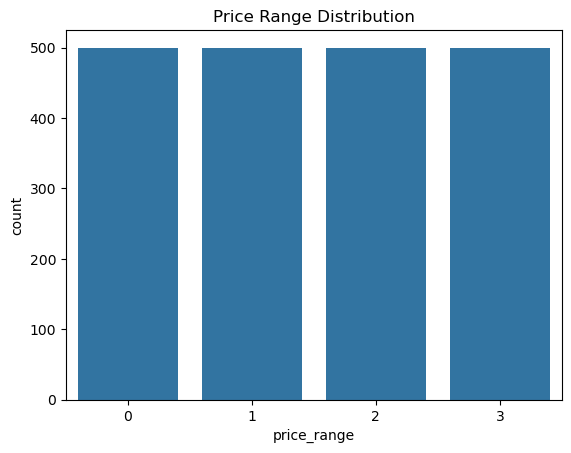

In [9]:
#DATA ANALYSIS
sns.countplot(x='price_range', data=data)
plt.title("Price Range Distribution")
plt.show()


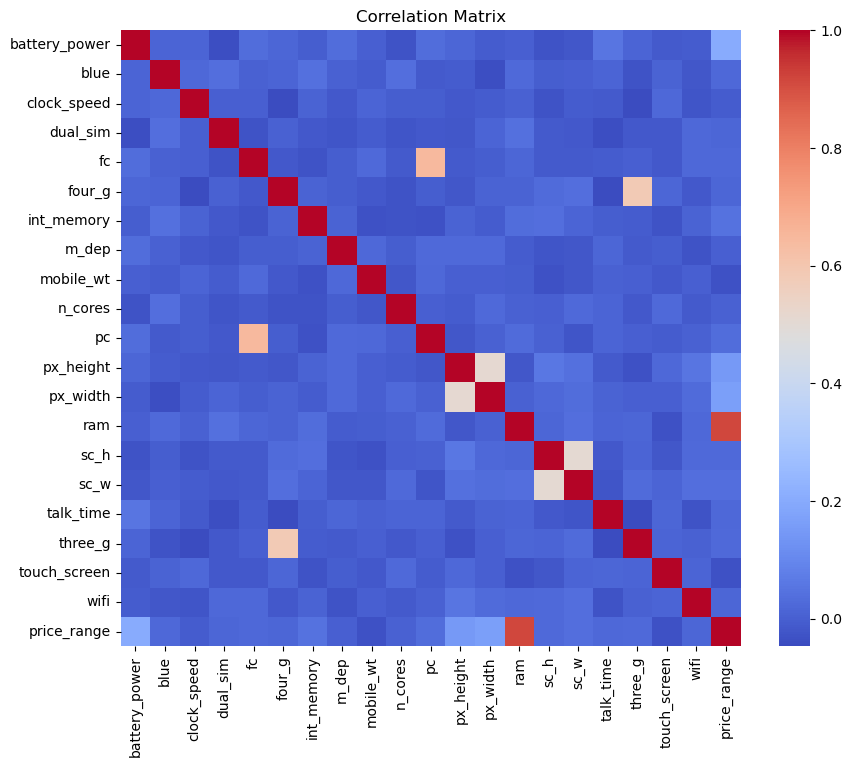

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [12]:
X = data.drop("price_range", axis=1)
y = data["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
#model evaluation
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

LOGISTIC REGRESSION
Accuracy: 0.965
Confusion Matrix:
 [[98  2  0  0]
 [ 1 96  3  0]
 [ 0  2 94  4]
 [ 0  0  2 98]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



In [15]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("RANDOM FOREST")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

RANDOM FOREST
Accuracy: 0.88
Confusion Matrix:
 [[96  4  0  0]
 [ 5 84 11  0]
 [ 0 14 79  7]
 [ 0  0  7 93]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.82      0.84      0.83       100
           2       0.81      0.79      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("K-NEAREST NEIGHBORS")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

K-NEAREST NEIGHBORS
Accuracy: 0.5
Confusion Matrix:
 [[70 26  4  0]
 [33 38 24  5]
 [ 5 39 41 15]
 [ 0 13 36 51]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       100
           1       0.33      0.38      0.35       100
           2       0.39      0.41      0.40       100
           3       0.72      0.51      0.60       100

    accuracy                           0.50       400
   macro avg       0.52      0.50      0.51       400
weighted avg       0.52      0.50      0.51       400



In [18]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("GRADIENT BOOSTING")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

GRADIENT BOOSTING
Accuracy: 0.9125
Confusion Matrix:
 [[98  2  0  0]
 [ 5 86  9  0]
 [ 0  8 87  5]
 [ 0  0  6 94]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.90      0.86      0.88       100
           2       0.85      0.87      0.86       100
           3       0.95      0.94      0.94       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [19]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SUPPORT VECTOR MACHINE")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SUPPORT VECTOR MACHINE
Accuracy: 0.895
Confusion Matrix:
 [[94  6  0  0]
 [ 4 87  9  0]
 [ 0  7 87  6]
 [ 0  0 10 90]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.87      0.87      0.87       100
           2       0.82      0.87      0.84       100
           3       0.94      0.90      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [32]:
model_accuracies = {
    "LOGISTIC REGRESSION": accuracy_score(y_test, lr_pred),
    "RANDOM FOREST": accuracy_score(y_test, rf_pred),
    "GRADIENT BOOSTING": accuracy_score(y_test, gb_pred),
    "SVM": accuracy_score(y_test, svm_pred),
    "KNN": accuracy_score(y_test, knn_pred),}
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_acc = model_accuracies[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_acc:.2f}")

Best Model: LOGISTIC REGRESSION
Test Accuracy: 0.96


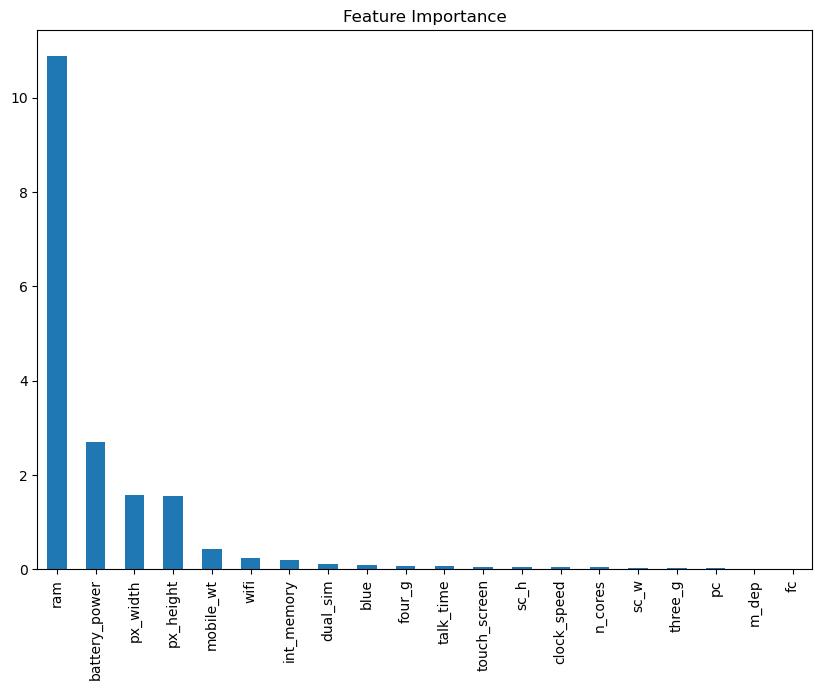

ram              10.888021
battery_power     2.697611
px_width          1.568898
px_height         1.553335
mobile_wt         0.422961
wifi              0.231969
int_memory        0.201302
dual_sim          0.109435
blue              0.097516
four_g            0.075147
talk_time         0.059847
touch_screen      0.057155
sc_h              0.057052
clock_speed       0.048368
n_cores           0.040699
sc_w              0.032184
three_g           0.026885
pc                0.020106
m_dep             0.012285
fc                0.006113
dtype: float64

In [35]:
import warnings
warnings.filterwarnings("ignore")
feat_imp = pd.Series(abs(lr_model.coef_[0]), index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)
plt.figure(figsize=(10,7))
feat_imp.plot(kind="bar")
plt.title("Feature Importance")
plt.show()
feat_imp

In [36]:
sample_mobile = pd.DataFrame([{
    'battery_power': 1821,
    'blue': 1,
    'clock_speed': 1.2,
    'dual_sim': 0,
    'fc': 13,
    'four_g': 1,
    'int_memory': 44,
    'm_dep': 0.6,
    'mobile_wt': 141,
    'n_cores': 2,
    'pc': 14,
    'px_height': 1208,
    'px_width': 1212,
    'ram': 1411,
    'sc_h': 8,
    'sc_w': 2,
    'talk_time': 15,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 0
}])

# -------- PREDICTION ---------
prediction = lr_model.predict(sample_mobile)
print("Predicted Price Range:", prediction[0])

Predicted Price Range: 3


**1. Overview**

The aim of this project is to predict the price range of mobile phones by analyzing their technical features such as RAM, battery capacity, camera quality,etc....

Rather than estimating the exact selling price, the model classifies each mobile phone into four price categories:
     0 – Low cost, 1 – Medium cost, 2 – High cost, 3 – Very high cost.

Using this data, several machine learning models were trained and tested to determine which algorithm provides the most accurate price range prediction.

**2. Dataset**

The dataset includes the following mobile phone details:

Battery power (mAh),Bluetooth support (blue),Clock speed of processor,Dual SIM support,Front Camera megapixels,4G availability,Internal memory (GB),
Mobile depth,Mobile weight,Number of CPU cores,Primary camera megapixels,Pixel height and width,RAM (MB),Screen height and width,
Talk time (battery backup in hours),3G support,Touch screen availability,WiFi capability

Target Variable:Price range(0 – Low cost, 1 – Medium cost, 2 – High cost, 3 – Very high cost).

The dataset did not contain missing values, and all columns were numerical or binary, which made preprocessing straightforward.

3. Challenges Faced and How I Solved Them

    1. Missing Values

    I checked for missing values using isnull().sum().

    Finding: There were no missing values.

    Action: No data filling was needed.

    2. Multi-Class Classification

    The target variable had four different categories, making the prediction more complex.

    What I did: Selected models that support multi-class classification directly like Random Forest, SVM, and Gradient Boosting.

    Reason: They perform well for classification problems with more than two classes.

    3. Feature Scaling

    Some features like RAM and pixel resolution had very large values, while binary features like WiFi or Bluetooth had values of 0 or 1.

    What I did: Used StandardScaler() to standardize all numeric columns.

    Reason: Algorithms like Logistic Regression, KNN, and SVM perform better when all data is on the same scale.

    4. Model Selection

    Different models produced different results.

    What I did: Evaluated all algorithms using accuracy score and cross-validation.

    Reason: Helped in selecting the most reliable model

    5. Correlated Features

   Pairs like pixel width & height and screen width & height were strongly correlated.

    What I did: Kept both initially but checked their importance later.

    Reason: Tree-based models can handle correlated features well and determine actual importance automatically.

**4.Models used**

| Model                         | Why I Used It                                  |
| ----------------------------- | ---------------------------------------------- |
| **Logistic Regression**       | Simple baseline model and easy to interpret    |
| Random Forest                 | Handles overfitting well                       |
| Gradient Boosting             | Builds models sequentially for higher accuracy |
| Support Vector Machine (SVM)  | Works well for classification problems         |
| K-Nearest Neighbors (KNN)     | Simple, effective for small datasets           |


**5. Key Insights**

RAM is the most important factor in determining the price range of mobiles.

Battery power and camera quality significantly influence premium pricing.

Models performed better after applying feature scaling.

Among all algorithms, **Logistic Regression achieved the highest accuracy**.

Gradient Boosting and SVM also performed well with strong prediction results.

Random Forest achieved accuracy, slightly lower than other top models.

KNN had the lowest accuracy, showing it was not well-suited for this dataset.

**6. Conclusion**

After comparing all five classification models, the Logistic Regression showed the best overall performance with the highest accuracy and stable predictions.

Proper preprocessing steps — especially feature scaling and data cleaning — significantly improved model results.

This project demonstrates that machine learning can effectively support pricing decisions for smartphone manufacturers by predicting accurate price ranges based on product specifications.